In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
sns.set()

In [245]:
Dfpl=pd.read_csv("/Users/aa085/Downloads/Zula.csv")

In [246]:
Dfpl.columns

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Value', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot'],
      dtype='object')

In [247]:
Dfpl.loc[Dfpl["Heights"]==0.00,"Heights"]=np.mean(Dfpl["Heights"])

# Confidence Intervals

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/1222158270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dfpl["Currentvalue(M)"])


<Axes: xlabel='Currentvalue(M)', ylabel='Density'>

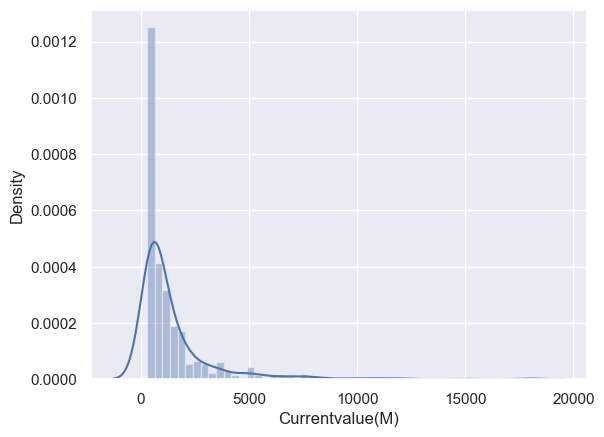

In [248]:
sns.distplot(Dfpl["Currentvalue(M)"])

In [296]:
Conf=Dfpl[(Dfpl["ContributionPerMin"] < 140) & (Dfpl["ages"] < 28) & (Dfpl["ages"] > 22)]

In [297]:
Conf["Currentvalue(M)"]=Conf["Currentvalue(M)"]/100

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2736707409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conf["Currentvalue(M)"]=Conf["Currentvalue(M)"]/100


In [323]:
Conf=Conf[(Conf["Currentvalue(M)"] > 20) | (Conf["ages"] > 24)]

In [324]:
Conf.describe()

,Matches,Goals,Injury_Sum,Shirt Number,ages,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),ContributionPerMin
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,48.000000,48.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,264.986301,99.136986,36.287671,15.575342,25.232877,1.836027,463.966667,21.613542,45.356164,28.000000,0.726027,17192.739726,35.338356,121.469533
std,63.765302,36.235079,34.019798,11.036452,1.219296,0.064134,681.439176,23.374504,22.463161,15.993054,0.916822,4766.875715,40.465234,13.779047
min,141.000000,53.000000,0.000000,7.000000,23.000000,1.700000,11.100000,2.600000,7.000000,6.000000,0.000000,8691.000000,3.000000,68.672922
25%,224.000000,77.000000,10.000000,9.000000,24.000000,1.780000,39.625000,5.875000,28.000000,19.000000,0.000000,14595.000000,8.000000,112.269231
50%,263.000000,89.000000,31.000000,10.000000,25.000000,1.850000,202.800000,12.125000,43.000000,25.000000,0.000000,16443.000000,18.000000,124.568182
75%,298.000000,111.000000,49.000000,20.000000,26.000000,1.880000,662.500000,30.000000,57.000000,35.000000,1.000000,19797.000000,50.000000,131.221239
max,466.000000,256.000000,159.000000,77.000000,27.000000,2.000000,3100.000000,110.000000,117.000000,88.000000,3.000000,32287.000000,180.000000,139.470588


In [328]:
len(Conf)

73

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/1680674770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Conf["Currentvalue(M)"])


<Axes: xlabel='Currentvalue(M)', ylabel='Density'>

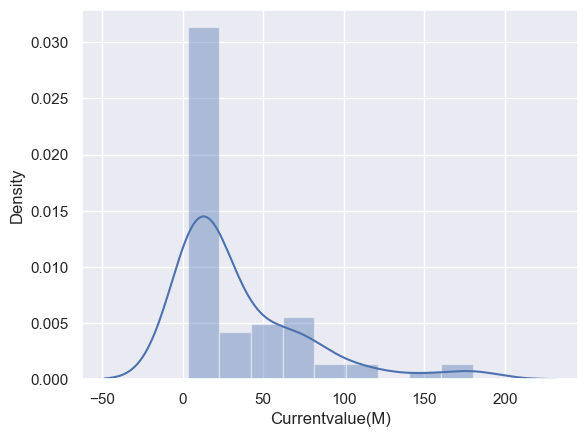

In [329]:
sns.distplot(Conf["Currentvalue(M)"])

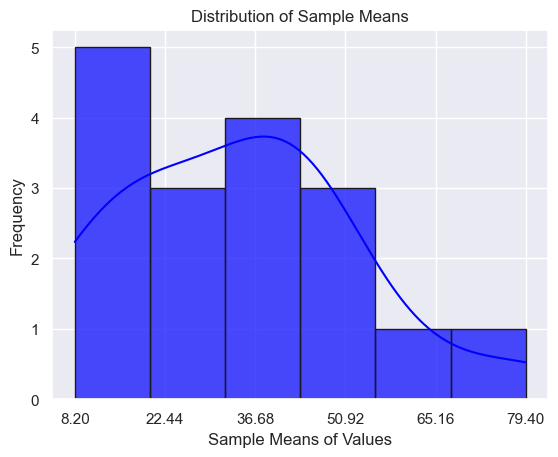

In [312]:
Value=Conf["Currentvalue(M)"]
num_samples = 17
sample_size = len(Value) // num_samples
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(Value, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean) 
sns.histplot(sample_means,bins=6, kde=True,edgecolor='k',color='blue', alpha=0.7)
plt.xlabel('Sample Means of Values')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
x_ticks = np.linspace(min(sample_means), max(sample_means),6)  
plt.xticks(x_ticks)
plt.show()

In [330]:
shapiro_stat, shapiro_pvalue = stats.shapiro(sample_means)
if shapiro_pvalue < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

The sample means follow a normal distribution.


In [331]:
len(sample_means)-1

16

In [332]:
Interval1=np.mean(sample_means) -  1.7531*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval1

26.216294784428353

In [333]:
Interval2=np.mean(sample_means) +  1.7531*(np.std(sample_means)/np.sqrt(len(sample_means)))
Interval2

41.8519405096893

## Hypothesis

In [337]:
Left=Dfpl[Dfpl["PrefFoot"]=="left"]

In [349]:
Num1=np.mean(Left["minutos"]/Left["Goals"])
Num2=np.mean(Right["minutos"]/Right["Goals"])
print(Num1,Num2)

310.04244354948463 277.73256996785415


In [338]:
Right=Dfpl[Dfpl["PrefFoot"]=="right"]

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/1502868354.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Left["Goals"])


<Axes: xlabel='Goals', ylabel='Density'>

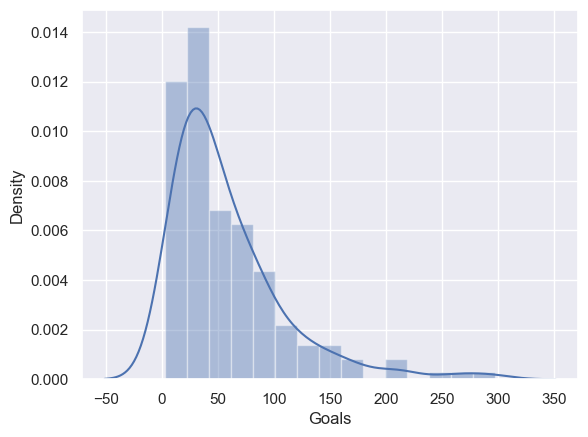

In [339]:
sns.distplot(Left["Goals"])

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2771409728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Right["Goals"])


<Axes: xlabel='Goals', ylabel='Density'>

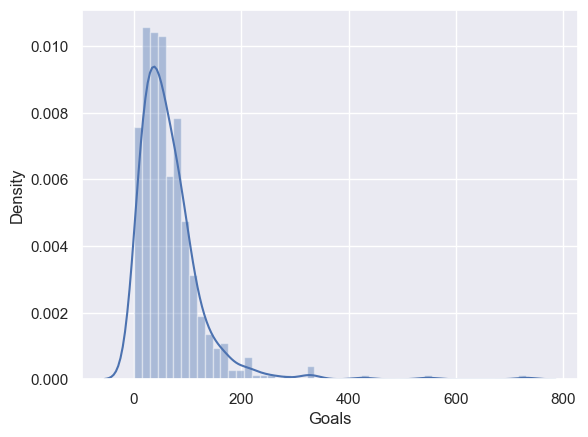

In [340]:
sns.distplot(Right["Goals"])

In [341]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(Right["Goals"], Left["Goals"])

alpha = 0.10
significant_difference = p_value < alpha

print("U-statistic:", u_statistic)
print("P-value:", p_value)
print("Is the difference significant:", "Yes" if significant_difference else "No")

U-statistic: 52398.0
P-value: 0.02966866406637908
Is the difference significant: Yes


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/541016843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Left["Assist"])


<Axes: xlabel='Assist', ylabel='Density'>

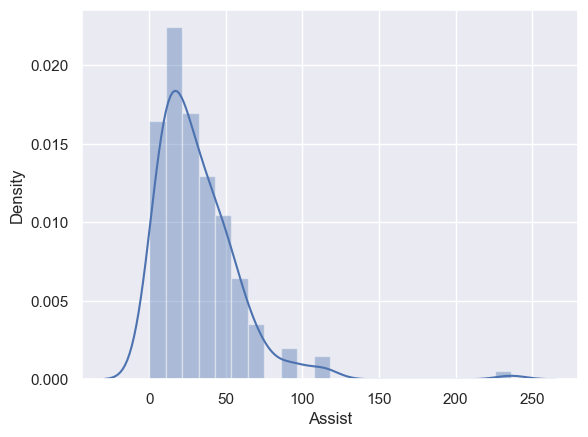

In [346]:
sns.distplot(Left["Assist"])

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2972732895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Right["Assist"])


<Axes: xlabel='Assist', ylabel='Density'>

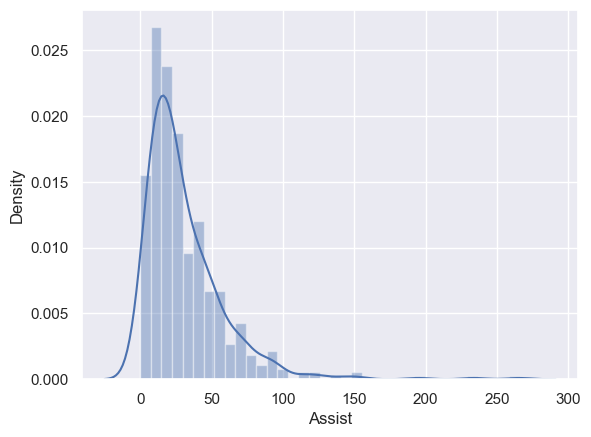

In [347]:
sns.distplot(Right["Assist"])

In [348]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(Right["Assist"], Left["Assist"])

alpha = 0.10
significant_difference = p_value < alpha

print("U-statistic:", u_statistic)
print("P-value:", p_value)
print("Is the difference significant:", "Yes" if significant_difference else "No")

U-statistic: 45358.5
P-value: 0.4039385531258506
Is the difference significant: No


# Creating Input data for Tableau

In [355]:
Dfpl.groupby("Country").sum()/Dfpl.groupby("Country").count()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/34777387.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Dfpl.groupby("Country").sum()/Dfpl.groupby("Country").count()


,Achievements,Assist,ContributionPerMin,Currentvalue(M),Difference Percentage,Goals,Heights,Injury_Sum,Links,Matches,Name,PrefFoot,Progress,Red Cards Count,Shirt Number,Sub-Position,Value,Yellow Cards Count,ages,minutos
Country,,,,,,,,,,,,,,,,,,,,
0,NaN,17.000000,144.863158,300.000000,900.000000,78.000000,1.773302,18.000000,NaN,210.000000,NaN,NaN,2.700000,0.000000,0.000000,NaN,NaN,9.000000,23.000000,13762.000000
Albania,NaN,23.250000,164.043264,1100.000000,1422.600000,61.250000,1.840000,30.750000,NaN,198.500000,NaN,NaN,9.387500,0.250000,12.500000,NaN,NaN,24.000000,24.750000,13477.500000
Algeria,NaN,24.833333,151.850305,1425.000000,207.833333,38.833333,1.776667,11.500000,NaN,157.000000,NaN,NaN,5.308333,0.166667,21.666667,NaN,NaN,10.833333,22.500000,9493.166667
Angola,NaN,17.000000,198.070989,616.666667,409.266667,34.333333,1.766667,20.000000,NaN,153.000000,NaN,NaN,4.350000,0.666667,35.333333,NaN,NaN,21.333333,24.333333,10033.333333
Argentina,NaN,14.628571,224.504618,1251.142857,1100.017143,29.942857,1.766857,7.085714,NaN,129.285714,NaN,NaN,8.304000,0.314286,20.400000,NaN,NaN,14.114286,22.314286,7820.885714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,NaN,19.000000,181.855535,1005.555556,708.944444,51.111111,1.808889,22.666667,NaN,171.111111,NaN,NaN,7.861111,0.222222,18.111111,NaN,NaN,13.555556,22.666667,11058.888889
Unknown,NaN,15.916667,211.503215,470.833333,1930.350000,25.500000,1.773302,8.916667,NaN,106.666667,NaN,NaN,4.410833,0.333333,28.250000,NaN,NaN,9.583333,20.583333,6648.916667
Uruguay,NaN,20.714286,203.791868,1000.000000,452.235714,40.285714,1.803571,11.785714,NaN,173.928571,NaN,NaN,7.509286,0.857143,16.500000,NaN,NaN,26.642857,23.214286,11486.642857


In [357]:
country_goals_sum = Dfpl.groupby("Country")["Currentvalue(M)"].transform("sum")
country_players_count = Dfpl.groupby("Country")["Country"].transform("count")
result = country_goals_sum / country_players_count
Dfpl["ValuePerCountry"] = result
Dfpl

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry
0,Jack Clarke,Left Winger,England,166,29,"€15.00m Last update: Oct 27, 2023",https://www.transfermarkt.us/jack-clarke/profi...,0,1x English 2nd tier champion,20,...,10.00,29,26,0,10920,1500,right,188.275862,73.245614,2347.719298
1,Luka Ivanusec,Left Winger,Croatia,272,48,"€12.00m Last update: Jun 6, 2023",https://www.transfermarkt.us/luka-ivanusec/pro...,19,"4x Croatian champion, 1x Croatian cup winner",17,...,NaN,34,26,0,19879,1200,right,242.426829,79.812500,584.375000
2,Michael Gregor...,Centre-Forward,Austria,420,94,"€8.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/michael-gregorits...,39,1x Steiermark league champion,38,...,5.00,29,57,0,24092,800,left,195.869919,75.333333,755.555556
3,Isaiah Jones,Right Winger,England,137,12,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/isaiah-jones/prof...,8,NaN,11,...,3.45,23,27,0,9737,350,right,278.200000,73.245614,2347.719298
4,Mathys Tel,Centre-Forward,France,63,21,"€50.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/mathys-tel/profil...,4,"1x German Champion, 1x European Under-17 champion",39,...,50.00,2,3,0,1857,5000,right,80.739130,74.230769,2069.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Raphinha,Right Winger,Brazil,306,74,"€60.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/raphinha/profil/s...,27,"1x Spanish champion, 1x Spanish Super Cup winn...",11,...,30.00,53,52,1,21080,6000,left,165.984252,41.431373,2055.882353
738,Gabriel Strefezza,Right Winger,Brazil,238,43,"€10.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/gabriel-strefezza...,6,2x Italienischer Zweitligameister,27,...,6.80,26,42,1,15832,1000,right,229.449275,41.431373,2055.882353
739,Omar Marmoush,Centre-Forward,Egypt,165,43,"€8.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/omar-marmoush/pro...,9,1x German Regionalliga North Champion,7,...,6.00,13,17,0,8627,800,right,154.053571,43.000000,800.000000
740,Firas Al-Buraikan,Centre-Forward,Saudi Arabia,115,40,"€4.00m Last update: Oct 24, 2023",https://www.transfermarkt.us/firas-al-buraikan...,0,"1x Saudi Arabian champion, 1x Saudi Super Cup ...",20,...,3.65,15,8,0,6763,400,left,122.963636,40.000000,400.000000


In [360]:
Dfpl.sort_values(by="ValuePerCountry")

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry
724,Tobias Lauritsen,Unknown,0,210,78,"€3.00m Last update: Jun 23, 2023",https://www.transfermarkt.us/tobias-lauritsen/...,18,NaN,0,...,2.70,17,9,0,13762,300,Unknown,144.863158,78.000000,300.000000
570,Alieu Fadera,Left Winger,The Gambia,110,17,"€3.00m Last update: Jun 9, 2023",https://www.transfermarkt.us/alieu-fadera/prof...,3,NaN,7,...,2.70,20,19,0,7317,300,right,197.756757,17.000000,300.000000
394,Marcus Forss,Centre-Forward,Finland,180,50,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/marcus-forss/prof...,75,1x Top goal scorer,21,...,NaN,13,12,0,8774,350,right,139.269841,77.000000,350.000000
692,Luis Palma,Left Winger,Honduras,132,43,"€3.50m Last update: Sep 22, 2023",https://www.transfermarkt.us/luis-palma/profil...,0,1x USL Cup Champion,7,...,3.38,14,15,1,8283,350,right,145.315789,43.000000,350.000000
408,Joel Pohjanpalo,Centre-Forward,Finland,299,104,"€3.50m Last update: Jun 12, 2023",https://www.transfermarkt.us/joel-pohjanpalo/p...,139,"1x Top goal scorer, 3x Finnish champion",20,...,NaN,22,11,0,17788,350,right,141.174603,77.000000,350.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Victor Osimhen,Centre-Forward,Nigeria,201,103,"€120.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/victor-osimhen/pr...,71,"3x Top goal scorer, 1x TM-Player of the season...",9,...,70.00,25,24,1,14282,12000,right,111.578125,54.545455,2986.363636
665,Samuel Chukwueze,Right Winger,Nigeria,236,41,"€25.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/samuel-chukwueze/...,162,"1x Europa League winner, 1x Under-17 World Cup...",21,...,5.00,33,13,0,13744,2500,left,185.729730,54.545455,2986.363636
691,Akor Adams,Centre-Forward,Nigeria,117,51,"€8.00m Last update: Oct 16, 2023",https://www.transfermarkt.us/akor-adams/profil...,0,NaN,8,...,7.95,14,12,0,7035,800,right,108.230769,54.545455,2986.363636
161,Georges Mikaut...,Centre-Forward,Georgia,125,70,"€10.00m Last update: Jun 16, 2023",https://www.transfermarkt.us/georges-mikautadz...,2,"2x Top goal scorer, 1x Player of the Year",19,...,8.80,14,16,1,10168,1000,right,121.047619,54.500000,4750.000000


In [249]:
Dfpl[Dfpl['ages']<25].groupby("Country").sum()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/3113309616.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Dfpl[Dfpl['ages']<25].groupby("Country").sum()


,Matches,Goals,Injury_Sum,Shirt Number,ages,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M)
Country,,,,,,,,,,,,,
0,210,78,18,0,23,1.773302,900.0,2.70,17,9,0,13762,300
Albania,310,77,85,30,46,3.700000,4733.3,28.90,31,31,0,19583,3200
Algeria,610,157,67,108,107,8.940000,1233.4,28.85,92,50,0,36603,6050
Angola,101,24,10,77,21,1.710000,400.0,4.00,13,14,0,6012,500
Argentina,2446,509,101,550,547,46.270000,35874.9,223.16,267,218,3,143253,24310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,881,269,83,116,129,10.800000,3583.3,53.00,111,75,0,57132,7000
Unknown,955,230,98,314,220,19.506321,22847.5,49.13,125,74,3,55181,5150
Uruguay,1255,331,78,154,218,18.180000,3845.3,89.50,150,162,3,82551,12150


In [253]:
Dfpl["ContributionPerMin"]=Dfpl["minutos"]/(Dfpl["Goals"]+Dfpl["Assist"])

In [254]:
Dfpl.sort_values(by="ContributionPerMin")

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin
52,Youssoufa Moukoko,Centre-Forward,Germany,172,156,"€30.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/youssoufa-moukoko...,57,"5x Top goal scorer, 1x German cup winner, 1x E...",18,...,1.79,66.7,12.0,35,12,0,10284,3000,left,53.842932
705,Ilyes Housni,Centre-Forward,Morocco,33,30,"€3.50m Last update: Jun 27, 2023",https://www.transfermarkt.us/ilyes-housni/prof...,0,1x French champion,12,...,1.72,0.0,3.5,7,2,0,2269,350,right,61.324324
160,Carlos Forbs,Left Winger,Portugal,93,56,"€10.00m Last update: Aug 2, 2023",https://www.transfermarkt.us/carlos-forbs/prof...,2,"1x Top goal scorer, 2x U21 Premier League cham...",11,...,1.69,0.0,10.0,44,8,0,6229,1000,left,62.290000
424,Kylian Mbappé,Left Winger,France,339,256,"€180.00m Last update: Jun 27, 2023",https://www.transfermarkt.us/kylian-mbappe/pro...,32,"3x Footballer of the Year, 10x Top goal scorer...",7,...,1.78,12.5,20.0,117,43,3,25615,18000,right,68.672922
271,Nelson Weiper,Centre-Forward,Germany,52,43,"€5.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/nelson-weiper/pro...,0,"1x Top goal scorer, 1x German Under-19 Bundesl...",44,...,1.92,0.0,5.0,5,7,0,3316,500,right,69.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Brian Aguirre,Left Winger,Argentina,51,3,"€8.00m Last update: Oct 4, 2023",https://www.transfermarkt.us/brian-aguirre/pro...,8,NaN,18,...,1.75,0.0,8.0,5,8,0,3418,800,right,427.250000
71,Dwight McNeil,Left Winger,England,198,14,"€20.00m Last update: Jun 20, 2023",https://www.transfermarkt.us/dwight-mcneil/pro...,10,NaN,7,...,1.83,NaN,NaN,22,17,0,15640,2000,left,434.444444
538,Gianluca Prest...,Right Winger,Argentina,38,3,"€5.00m Last update: Jul 4, 2023",https://www.transfermarkt.us/gianluca-prestian...,0,NaN,11,...,1.66,0.0,5.0,1,6,0,1774,500,right,443.500000
431,Ilias Akhomach,Right Winger,Spain,66,5,"€3.00m Last update: Jun 30, 2023",https://www.transfermarkt.us/ilias-akhomach/pr...,4,NaN,27,...,1.75,2900.0,2.9,3,7,2,3588,300,left,448.500000


In [385]:
A1=Dfpl.groupby("Country").sum()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/4221069274.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  A1=Dfpl.groupby("Country").sum()


In [386]:
A2=Dfpl.groupby("Country").sum()
A2

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/1528952372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  A2=Dfpl.groupby("Country").sum()


,Matches,Goals,Injury_Sum,Shirt Number,ages,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),ContributionPerMin,GoalPerCountry,ValuePerCountry
Country,,,,,,,,,,,,,,,,
0,210,78,18,0,23,1.773302,900.0,2.70,17,9,0,13762,300,144.863158,78.0,300.0
Albania,794,245,123,50,99,7.360000,5690.4,37.55,93,96,1,53910,4400,656.173055,245.0,4400.0
Algeria,942,233,69,130,135,10.660000,1247.0,31.85,149,65,1,56959,8550,911.101830,233.0,8550.0
Angola,459,103,60,106,73,5.300000,1227.8,13.05,51,64,2,30100,1850,594.212967,103.0,1850.0
Argentina,4525,1048,248,714,781,61.840000,38500.6,290.64,512,494,11,273731,43790,7857.661628,1048.0,43790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,1540,460,204,163,204,16.280000,6380.5,70.75,171,122,2,99530,9050,1636.699812,460.0,9050.0
Unknown,1280,306,107,339,247,21.279623,23164.2,52.93,191,115,4,79787,5650,2538.038577,306.0,5650.0
Uruguay,2435,564,165,231,325,25.250000,6331.3,105.13,290,373,12,160813,14000,2853.086152,564.0,14000.0


In [387]:
A1["Path"]=0
A2["Path"]=270
A2

,Matches,Goals,Injury_Sum,Shirt Number,ages,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),ContributionPerMin,GoalPerCountry,ValuePerCountry,Path
Country,,,,,,,,,,,,,,,,,
0,210,78,18,0,23,1.773302,900.0,2.70,17,9,0,13762,300,144.863158,78.0,300.0,270
Albania,794,245,123,50,99,7.360000,5690.4,37.55,93,96,1,53910,4400,656.173055,245.0,4400.0,270
Algeria,942,233,69,130,135,10.660000,1247.0,31.85,149,65,1,56959,8550,911.101830,233.0,8550.0,270
Angola,459,103,60,106,73,5.300000,1227.8,13.05,51,64,2,30100,1850,594.212967,103.0,1850.0,270
Argentina,4525,1048,248,714,781,61.840000,38500.6,290.64,512,494,11,273731,43790,7857.661628,1048.0,43790.0,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,1540,460,204,163,204,16.280000,6380.5,70.75,171,122,2,99530,9050,1636.699812,460.0,9050.0,270
Unknown,1280,306,107,339,247,21.279623,23164.2,52.93,191,115,4,79787,5650,2538.038577,306.0,5650.0,270
Uruguay,2435,564,165,231,325,25.250000,6331.3,105.13,290,373,12,160813,14000,2853.086152,564.0,14000.0,270


In [388]:
A3=pd.concat([A1,A2],axis=0)

In [389]:
A3.to_csv("Zula2.csv")

In [381]:
A3

,Matches,Goals,Injury_Sum,Shirt Number,ages,Heights,Difference Percentage,Progress,Assist,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),ContributionPerMin,GoalPerCountry,ValuePerCountry,Path
Country,,,,,,,,,,,,,,,,,
0,210.000000,78.000000,18.000000,0.000000,23.000000,1.773302,900.000000,2.700000,17.000000,9.000000,0.000000,13762.000000,300.000000,144.863158,78.000000,300.000000,0.000000
Albania,198.500000,61.250000,30.750000,12.500000,24.750000,1.840000,1422.600000,9.387500,23.250000,24.000000,0.250000,13477.500000,1100.000000,164.043264,61.250000,1100.000000,0.000000
Algeria,157.000000,38.833333,11.500000,21.666667,22.500000,1.776667,207.833333,5.308333,24.833333,10.833333,0.166667,9493.166667,1425.000000,151.850305,38.833333,1425.000000,0.000000
Angola,153.000000,34.333333,20.000000,35.333333,24.333333,1.766667,409.266667,4.350000,17.000000,21.333333,0.666667,10033.333333,616.666667,198.070989,34.333333,616.666667,0.000000
Argentina,129.285714,29.942857,7.085714,20.400000,22.314286,1.766857,1100.017143,8.304000,14.628571,14.114286,0.314286,7820.885714,1251.142857,224.504618,29.942857,1251.142857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,171.111111,51.111111,22.666667,18.111111,22.666667,1.808889,708.944444,7.861111,19.000000,13.555556,0.222222,11058.888889,1005.555556,181.855535,51.111111,1005.555556,1005.555556
Unknown,106.666667,25.500000,8.916667,28.250000,20.583333,1.773302,1930.350000,4.410833,15.916667,9.583333,0.333333,6648.916667,470.833333,211.503215,25.500000,470.833333,470.833333
Uruguay,173.928571,40.285714,11.785714,16.500000,23.214286,1.803571,452.235714,7.509286,20.714286,26.642857,0.857143,11486.642857,1000.000000,203.791868,40.285714,1000.000000,1000.000000


In [919]:
def calculate_player_value(player_data):
    performance_score = player_data['Goals'] + player_data['Assist']
    age = player_data['ages']
    Injury_duration = player_data['Injury_Sum']
    awards = len(player_data["Achievements"])    

    if 16 < age < 25:
        player_value = (
            33 * performance_score -  
            0.1 * Injury_duration +
            17 * awards
        )
    elif 25 <= age < 30:
        player_value = (
            21 * performance_score - 
            0.2 * Injury_duration +
            10 * awards
        )
    elif 33 >= age >= 30:
        player_value = (
            8 * performance_score - 
            3 * Injury_duration +
            3 * awards
        )
    else:
        player_value = (
            2 * performance_score - 
            12 * Injury_duration +
            2 * awards
        )
    
    return player_value

Dfplrank = Dfpl[Dfpl["Goals"] > 20]
Dfplrank["CalculatedValue"] = Dfplrank.apply(calculate_player_value, axis=1) / 100
Dfplrank["Currentvalue(M)"] = Dfplrank["Currentvalue(M)"]
Dfplrank.sort_values(by="CalculatedValue", ascending=False).head(20)


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2963413316.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfplrank["CalculatedValue"] = Dfplrank.apply(calculate_player_value, axis=1) / 100
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2963413316.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfplrank["Currentvalue(M)"] = Dfplrank["Currentvalue(M)"]


,Name,Sub-Position,Country,Matches,Goals,Links,Injury_Sum,Achievements,Shirt Number,ages,...,RecentProgress,League,Team,Goals2022,Goals2021,League_Code,Cups,position,Wonder,CalculatedValue
424,Kylian Mbappé,Left Winger,France,339,256,https://www.transfermarkt.us/kylian-mbappe/pro...,32,"3x Footballer of the Year, 10x Top goal scorer...",7,24,...,480.0,Ligue 1,Paris SG,42,39,6,12,0,1.312500,175.248
418,Erling Haaland,Centre-Forward,Norway,253,202,https://www.transfermarkt.us/erling-haaland/pr...,47,"1x UEFA Best Player in Europe, 5x Footballer o...",9,23,...,1150.0,Premier League ...,Man City,41,29,4,12,1,1.420792,132.603
655,Julián Álvarez,Centre-Forward,Argentina,188,78,https://www.transfermarkt.us/julian-alvarez/pr...,1,"1x TM-Player of the season, 1x Top goal scorer...",19,23,...,1495.0,Premier League ...,Man City,24,18,4,15,1,2.153846,108.799
658,Vinicius Junior,Left Winger,Brazil,291,77,https://www.transfermarkt.us/vinicius-junior/p...,20,"1x Top goal scorer, 1x Champions League winner...",7,23,...,2530.0,LaLiga,Real Madrid,6,22,3,9,0,0.545455,95.550
120,Memphis Depay,Centre-Forward,Netherlands,432,165,https://www.transfermarkt.us/memphis-depay/pro...,89,"1x Top goal scorer, 1x Spanish champion, 1x Eu...",9,29,...,NaN,LaLiga,Atlético Madrid,22,13,3,11,1,1.733333,82.532
52,Youssoufa Moukoko,Centre-Forward,Germany,172,156,https://www.transfermarkt.us/youssoufa-moukoko...,57,"5x Top goal scorer, 1x German cup winner, 1x E...",18,18,...,216.0,Bundesliga,Bor. Dortmund,16,3,2,4,1,0.205128,81.843
81,Timo Werner,Centre-Forward,Germany,466,208,https://www.transfermarkt.us/timo-werner/profi...,41,"3x Top goal scorer, 1x Champions League winner...",11,27,...,NaN,Bundesliga,RB Leipzig,12,11,2,7,1,0.634615,80.908
82,Phil Foden,Left Winger,England,276,86,https://www.transfermarkt.us/phil-foden/profil...,26,"1x Champions League winner, 5x English Champio...",47,23,...,690.0,Premier League ...,Man City,16,14,4,7,0,1.302326,79.624
30,Raheem Sterling,Left Winger,England,541,175,https://www.transfermarkt.us/raheem-sterling/p...,55,"1x Footballer of the Year, 4x English Champion...",7,28,...,NaN,Premier League ...,Chelsea,14,17,4,5,0,0.960000,78.300
49,Jadon Sancho,Left Winger,England,263,86,https://www.transfermarkt.us/jadon-sancho/prof...,38,"1x Top goal scorer, 1x German cup winner, 1x E...",25,23,...,NaN,Premier League ...,Man Utd,16,5,4,5,0,1.302326,77.172


In [655]:
corr=Dfplrank["Currentvalue(M)"]-(Dfplrank["CalculatedValue"])
corr.describe()

count    611.000000
mean     -13.939237
std       18.118351
min      -68.532000
25%      -24.734500
50%      -14.301000
75%       -5.972500
max       76.150000
dtype: float64

# Machine Learning

In [417]:
Dfpl["Individual Award"]=0
Dfpl["Achievements"].fillna("", inplace=True)
Dfpl.loc[Dfpl["Achievements"].str.contains("MVP|Top|Scorer|Player|Best|Ballon|Footballer|Award|Year"), "Individual Award"] = 1
Dfpl

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry,Individual,Individual Award
0,Jack Clarke,Left Winger,England,166,29,"€15.00m Last update: Oct 27, 2023",https://www.transfermarkt.us/jack-clarke/profi...,0,1x English 2nd tier champion,20,...,26,0,10920,1500,right,188.275862,73.245614,2347.719298,0,0
1,Luka Ivanusec,Left Winger,Croatia,272,48,"€12.00m Last update: Jun 6, 2023",https://www.transfermarkt.us/luka-ivanusec/pro...,19,"4x Croatian champion, 1x Croatian cup winner",17,...,26,0,19879,1200,right,242.426829,79.812500,584.375000,0,0
2,Michael Gregor...,Centre-Forward,Austria,420,94,"€8.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/michael-gregorits...,39,1x Steiermark league champion,38,...,57,0,24092,800,left,195.869919,75.333333,755.555556,0,0
3,Isaiah Jones,Right Winger,England,137,12,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/isaiah-jones/prof...,8,,11,...,27,0,9737,350,right,278.200000,73.245614,2347.719298,0,0
4,Mathys Tel,Centre-Forward,France,63,21,"€50.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/mathys-tel/profil...,4,"1x German Champion, 1x European Under-17 champion",39,...,3,0,1857,5000,right,80.739130,74.230769,2069.615385,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Raphinha,Right Winger,Brazil,306,74,"€60.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/raphinha/profil/s...,27,"1x Spanish champion, 1x Spanish Super Cup winn...",11,...,52,1,21080,6000,left,165.984252,41.431373,2055.882353,0,0
738,Gabriel Strefezza,Right Winger,Brazil,238,43,"€10.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/gabriel-strefezza...,6,2x Italienischer Zweitligameister,27,...,42,1,15832,1000,right,229.449275,41.431373,2055.882353,0,0
739,Omar Marmoush,Centre-Forward,Egypt,165,43,"€8.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/omar-marmoush/pro...,9,1x German Regionalliga North Champion,7,...,17,0,8627,800,right,154.053571,43.000000,800.000000,0,0
740,Firas Al-Buraikan,Centre-Forward,Saudi Arabia,115,40,"€4.00m Last update: Oct 24, 2023",https://www.transfermarkt.us/firas-al-buraikan...,0,"1x Saudi Arabian champion, 1x Saudi Super Cup ...",20,...,8,0,6763,400,left,122.963636,40.000000,400.000000,0,0


In [422]:
Dfpl.columns 

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Value', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot',
       'ContributionPerMin', 'GoalPerCountry', 'ValuePerCountry',
       'Individual Award'],
      dtype='object')

In [903]:
Dfheat=Dfpl.drop(["Progress","Difference Percentage","RecentProgress"],axis=1)

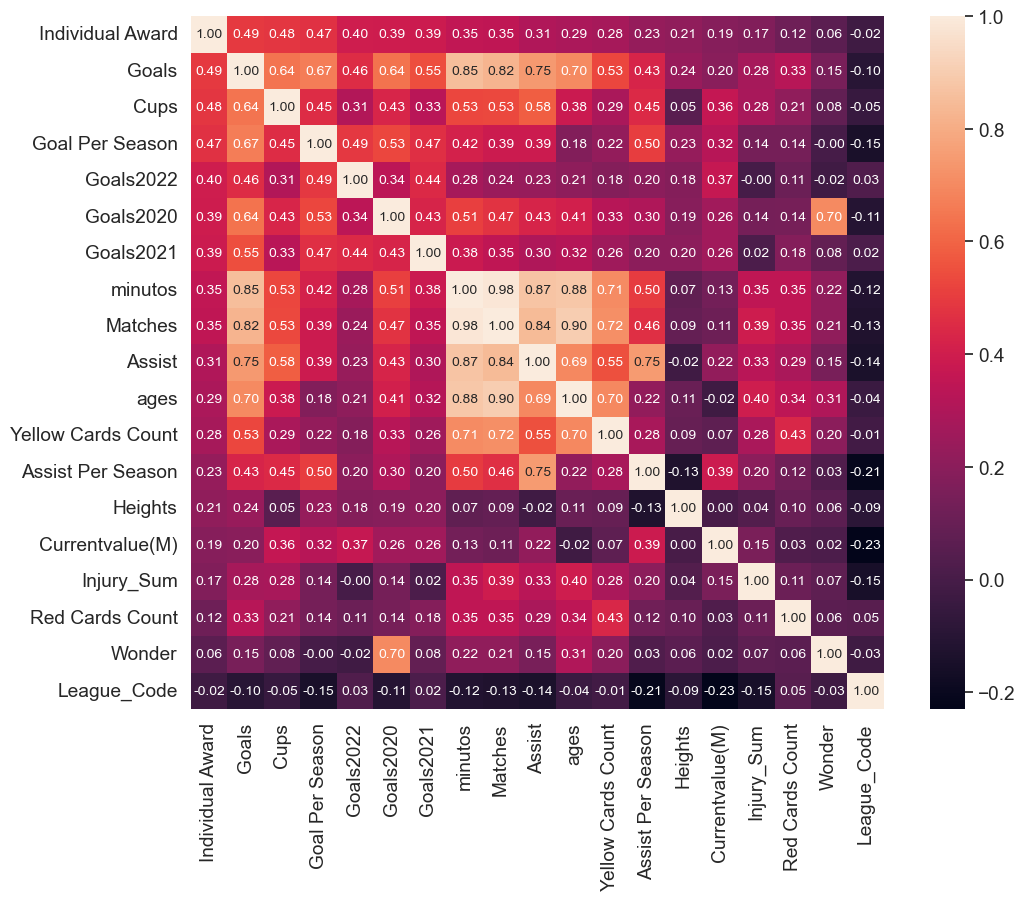

In [904]:
corrmat = Dfheat.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9)) 
k = 19 
cols = corrmat.nlargest(k, 'Individual Award')['Individual Award'].index
cm = np.corrcoef(Dfpl[cols].values.T) 
sns.set(font_scale=1.25) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

In [442]:
Dfpl["Goal Per Season"]=(Dfpl["Goals"]/(Dfpl["ages"]-16))
Dfpl

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Yellow Cards Count,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry,Individual Award,Goal Per Season
0,Jack Clarke,Left Winger,England,166,29,"€15.00m Last update: Oct 27, 2023",https://www.transfermarkt.us/jack-clarke/profi...,0,1x English 2nd tier champion,20,...,26,0,10920,1500,right,188.275862,73.245614,2347.719298,0,4.833333
1,Luka Ivanusec,Left Winger,Croatia,272,48,"€12.00m Last update: Jun 6, 2023",https://www.transfermarkt.us/luka-ivanusec/pro...,19,"4x Croatian champion, 1x Croatian cup winner",17,...,26,0,19879,1200,right,242.426829,79.812500,584.375000,0,6.000000
2,Michael Gregor...,Centre-Forward,Austria,420,94,"€8.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/michael-gregorits...,39,1x Steiermark league champion,38,...,57,0,24092,800,left,195.869919,75.333333,755.555556,0,7.230769
3,Isaiah Jones,Right Winger,England,137,12,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/isaiah-jones/prof...,8,,11,...,27,0,9737,350,right,278.200000,73.245614,2347.719298,0,1.500000
4,Mathys Tel,Centre-Forward,France,63,21,"€50.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/mathys-tel/profil...,4,"1x German Champion, 1x European Under-17 champion",39,...,3,0,1857,5000,right,80.739130,74.230769,2069.615385,0,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Raphinha,Right Winger,Brazil,306,74,"€60.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/raphinha/profil/s...,27,"1x Spanish champion, 1x Spanish Super Cup winn...",11,...,52,1,21080,6000,left,165.984252,41.431373,2055.882353,0,7.400000
738,Gabriel Strefezza,Right Winger,Brazil,238,43,"€10.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/gabriel-strefezza...,6,2x Italienischer Zweitligameister,27,...,42,1,15832,1000,right,229.449275,41.431373,2055.882353,0,4.300000
739,Omar Marmoush,Centre-Forward,Egypt,165,43,"€8.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/omar-marmoush/pro...,9,1x German Regionalliga North Champion,7,...,17,0,8627,800,right,154.053571,43.000000,800.000000,0,5.375000
740,Firas Al-Buraikan,Centre-Forward,Saudi Arabia,115,40,"€4.00m Last update: Oct 24, 2023",https://www.transfermarkt.us/firas-al-buraikan...,0,"1x Saudi Arabian champion, 1x Saudi Super Cup ...",20,...,8,0,6763,400,left,122.963636,40.000000,400.000000,0,5.714286


In [451]:
Dfpl["Assist Per Season"]=(Dfpl["Assist"]/(Dfpl["ages"]-16))
Dfpl

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,Red Cards Count,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry,Individual Award,Goal Per Season,Assist Per Season
0,Jack Clarke,Left Winger,England,166,29,"€15.00m Last update: Oct 27, 2023",https://www.transfermarkt.us/jack-clarke/profi...,0,1x English 2nd tier champion,20,...,0,10920,1500,right,188.275862,73.245614,2347.719298,0,4.833333,4.833333
1,Luka Ivanusec,Left Winger,Croatia,272,48,"€12.00m Last update: Jun 6, 2023",https://www.transfermarkt.us/luka-ivanusec/pro...,19,"4x Croatian champion, 1x Croatian cup winner",17,...,0,19879,1200,right,242.426829,79.812500,584.375000,0,6.000000,4.250000
2,Michael Gregor...,Centre-Forward,Austria,420,94,"€8.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/michael-gregorits...,39,1x Steiermark league champion,38,...,0,24092,800,left,195.869919,75.333333,755.555556,0,7.230769,2.230769
3,Isaiah Jones,Right Winger,England,137,12,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/isaiah-jones/prof...,8,,11,...,0,9737,350,right,278.200000,73.245614,2347.719298,0,1.500000,2.875000
4,Mathys Tel,Centre-Forward,France,63,21,"€50.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/mathys-tel/profil...,4,"1x German Champion, 1x European Under-17 champion",39,...,0,1857,5000,right,80.739130,74.230769,2069.615385,0,10.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Raphinha,Right Winger,Brazil,306,74,"€60.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/raphinha/profil/s...,27,"1x Spanish champion, 1x Spanish Super Cup winn...",11,...,1,21080,6000,left,165.984252,41.431373,2055.882353,0,7.400000,5.300000
738,Gabriel Strefezza,Right Winger,Brazil,238,43,"€10.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/gabriel-strefezza...,6,2x Italienischer Zweitligameister,27,...,1,15832,1000,right,229.449275,41.431373,2055.882353,0,4.300000,2.600000
739,Omar Marmoush,Centre-Forward,Egypt,165,43,"€8.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/omar-marmoush/pro...,9,1x German Regionalliga North Champion,7,...,0,8627,800,right,154.053571,43.000000,800.000000,0,5.375000,1.625000
740,Firas Al-Buraikan,Centre-Forward,Saudi Arabia,115,40,"€4.00m Last update: Oct 24, 2023",https://www.transfermarkt.us/firas-al-buraikan...,0,"1x Saudi Arabian champion, 1x Saudi Super Cup ...",20,...,0,6763,400,left,122.963636,40.000000,400.000000,0,5.714286,2.142857


In [529]:
Dfpl["RecentProgress"]=Dfpl["Progress"]*Dfpl["ages"]
Dfpl

,Name,Sub-Position,Country,Matches,Goals,Value,Links,Injury_Sum,Achievements,Shirt Number,...,minutos,Currentvalue(M),PrefFoot,ContributionPerMin,GoalPerCountry,ValuePerCountry,Individual Award,Goal Per Season,Assist Per Season,RecentProgress
0,Jack Clarke,Left Winger,England,166,29,"€15.00m Last update: Oct 27, 2023",https://www.transfermarkt.us/jack-clarke/profi...,0,1x English 2nd tier champion,20,...,10920,1500,right,188.275862,73.245614,2347.719298,0,4.833333,4.833333,220.00
1,Luka Ivanusec,Left Winger,Croatia,272,48,"€12.00m Last update: Jun 6, 2023",https://www.transfermarkt.us/luka-ivanusec/pro...,19,"4x Croatian champion, 1x Croatian cup winner",17,...,19879,1200,right,242.426829,79.812500,584.375000,0,6.000000,4.250000,NaN
2,Michael Gregor...,Centre-Forward,Austria,420,94,"€8.00m Last update: Jun 22, 2023",https://www.transfermarkt.us/michael-gregorits...,39,1x Steiermark league champion,38,...,24092,800,left,195.869919,75.333333,755.555556,0,7.230769,2.230769,145.00
3,Isaiah Jones,Right Winger,England,137,12,"€3.50m Last update: Jun 1, 2023",https://www.transfermarkt.us/isaiah-jones/prof...,8,,11,...,9737,350,right,278.200000,73.245614,2347.719298,0,1.500000,2.875000,82.80
4,Mathys Tel,Centre-Forward,France,63,21,"€50.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/mathys-tel/profil...,4,"1x German Champion, 1x European Under-17 champion",39,...,1857,5000,right,80.739130,74.230769,2069.615385,0,10.500000,1.000000,900.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Raphinha,Right Winger,Brazil,306,74,"€60.00m Last update: Jun 13, 2023",https://www.transfermarkt.us/raphinha/profil/s...,27,"1x Spanish champion, 1x Spanish Super Cup winn...",11,...,21080,6000,left,165.984252,41.431373,2055.882353,0,7.400000,5.300000,780.00
738,Gabriel Strefezza,Right Winger,Brazil,238,43,"€10.00m Last update: Jun 15, 2023",https://www.transfermarkt.us/gabriel-strefezza...,6,2x Italienischer Zweitligameister,27,...,15832,1000,right,229.449275,41.431373,2055.882353,0,4.300000,2.600000,176.80
739,Omar Marmoush,Centre-Forward,Egypt,165,43,"€8.00m Last update: Oct 18, 2023",https://www.transfermarkt.us/omar-marmoush/pro...,9,1x German Regionalliga North Champion,7,...,8627,800,right,154.053571,43.000000,800.000000,0,5.375000,1.625000,144.00
740,Firas Al-Buraikan,Centre-Forward,Saudi Arabia,115,40,"€4.00m Last update: Oct 24, 2023",https://www.transfermarkt.us/firas-al-buraikan...,0,"1x Saudi Arabian champion, 1x Saudi Super Cup ...",20,...,6763,400,left,122.963636,40.000000,400.000000,0,5.714286,2.142857,83.95


In [905]:
Dfpl.sort_values(by="Goal Per Season",ascending=False)[["Name","ages","Goals","Goal Per Season","Individual Award"]].head(10)

,Name,ages,Goals,Goal Per Season,Individual Award
52,Youssoufa Moukoko,18,156,78.000000,1
113,Cristiano Ronaldo,38,730,33.181818,1
424,Kylian Mbappé,24,256,32.000000,1
418,Erling Haaland,23,202,28.857143,1
58,Robert Lewando...,35,548,28.842105,1
131,Brian Brobbey,21,117,23.400000,1
16,Harry Kane,30,326,23.285714,1
336,Roony Bardghji,17,23,23.000000,0
577,Endrick,17,23,23.000000,1
112,Karim Benzema,35,426,22.421053,1


In [573]:
Dfplog=Dfpl[Dfpl["ages"]>17]

In [533]:
Dfplog["RecentProgress"].isna().sum()

242

In [467]:
Dfplog.sort_values(by="Goals",ascending=False)[["Name","ages","Goals","Assist Per Season","Individual Award"]].head(30)

,Name,ages,Goals,Assist Per Season,Individual Award
424,Kylian Mbappé,24,256,14.625000,1
61,Aleksandar Mit...,29,214,3.923077,1
212,Marvin Ducksch,29,203,7.076923,1
418,Erling Haaland,23,202,6.857143,1
583,Michael Olunga,29,171,2.153846,1
45,Ivan Toney,27,165,5.363636,1
52,Youssoufa Moukoko,18,156,17.500000,1
294,Ivan Sergeev,28,151,3.416667,1
604,Ricardo Gomes,31,148,2.666667,1
94,Niclas Füllkrug,30,147,3.357143,1


/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/484412029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dfplog["Goal Per Season"])


<Axes: xlabel='Goal Per Season', ylabel='Density'>

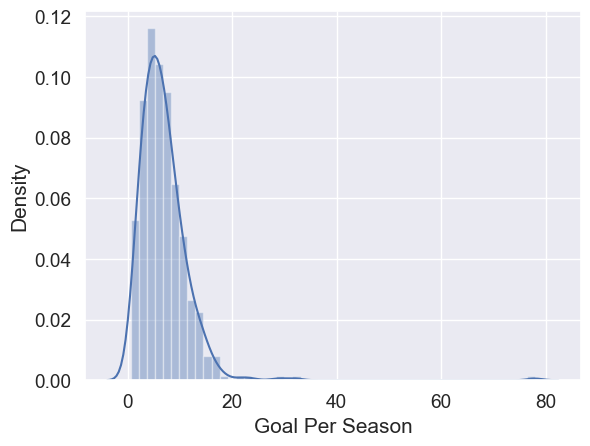

In [470]:
sns.distplot(Dfplog["Goal Per Season"])

In [574]:
Dfplog["Dummy Position"]=Dfplog["Sub-Position"].map({"Right Winger":0,"Left Winger":1,"Centre-Forward":2,"Second Striker":3})
Dfplog["Dummy Position"].value_counts()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_17169/2166071109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dfplog["Dummy Position"]=Dfplog["Sub-Position"].map({"Right Winger":0,"Left Winger":1,"Centre-Forward":2,"Second Striker":3})


2.0    345
1.0    199
0.0    166
3.0      8
Name: Dummy Position, dtype: int64

In [575]:
Dfplog.isna().sum()

Name                       0
Sub-Position               0
Country                    0
Matches                    0
Goals                      0
Value                      0
Links                      0
Injury_Sum                 0
Achievements               0
Shirt Number               0
ages                       0
Heights                    0
Difference Percentage    242
Progress                 242
Assist                     0
Yellow Cards Count         0
Red Cards Count            0
minutos                    0
Currentvalue(M)            0
PrefFoot                   0
ContributionPerMin         0
GoalPerCountry             0
ValuePerCountry            0
Individual Award           0
Goal Per Season            0
Assist Per Season          0
RecentProgress           242
Dummy Position            13
dtype: int64

In [576]:
Dfplog = Dfplog.dropna(subset=['Dummy Position']) 

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=Dfplog[['Dummy Position', 'Goal Per Season', 'Assist Per Season', 'RecentProgress', 'Injury_Sum']]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [500]:
vif

,vif,Features
0,2.545085,Dummy Position
1,5.228101,Goal Per Season
2,4.466205,Assist Per Season
3,1.892881,Progress
4,1.537789,Injury_Sum


In [541]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=Dfplog[['Dummy Position', 'Goal Per Season','RecentProgress', 'Injury_Sum']]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [542]:
vif

,vif,Features
0,2.499424,Dummy Position
1,3.014203,Goal Per Season
2,1.684561,RecentProgress
3,1.441063,Injury_Sum


In [543]:
selected_columns = ['Dummy Position', 'Goal Per Season', 'RecentProgress', 'Injury_Sum']
X = Dfplog[selected_columns]
y = Dfplog['Individual Award']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)

logistic_model = sm.Logit(y, X_scaled)
result = logistic_model.fit()

summary = result.summary()
summary

Optimization terminated successfully.
         Current function value: 0.387521
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Individual Award   No. Observations:                  476
Model:                          Logit   Df Residuals:                      471
Method:                           MLE   Df Model:                            4
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.2763
Time:                        18:37:35   Log-Likelihood:                -184.46
converged:                       True   LL-Null:                       -254.89
Covariance Type:            nonrobust   LLR p-value:                 1.839e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6058      0.149    -10.761      0.000      -1.898      -1.313
x1             0.2878      0.153      1.884      0.060      -0.012       0.587
x2             1.7536      0.229      7.672      0.000       1.306       2.202
x3             0.1863      0.116      1.612      0.107      -0.040       0.413
x4             0.0881      0.121      0.730      0.465      -0.148       0.325
==============================================================================
"""

### Concluded that Injuries & Progress doesn't contribut th model as intended

In [578]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

selected_columns = ['Dummy Position', 'Goal Per Season']

X = Dfplog[selected_columns]
y = Dfplog['Individual Award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

logistic_model = sm.Logit(y_train, X_train_scaled)
result = logistic_model.fit()

summary = result.summary()
print(summary)

y_pred = result.predict(X_test_scaled)

Optimization terminated successfully.
         Current function value: 0.411141
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       Individual Award   No. Observations:                  502
Model:                          Logit   Df Residuals:                      499
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.3119
Time:                        19:35:33   Log-Likelihood:                -206.39
converged:                       True   LL-Null:                       -299.94
Covariance Type:            nonrobust   LLR p-value:                 2.366e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1958      0.132     -9.041      0.000      -1.455      -0.937
x1             0.2068      0.

Accuracy: 0.7777777777777778
Precision: 0.5869565217391305
Recall: 0.48214285714285715
F1 Score: 0.5294117647058824
ROC AUC Score: 0.8125
Confusion Matrix:
[[141  19]
 [ 29  27]]


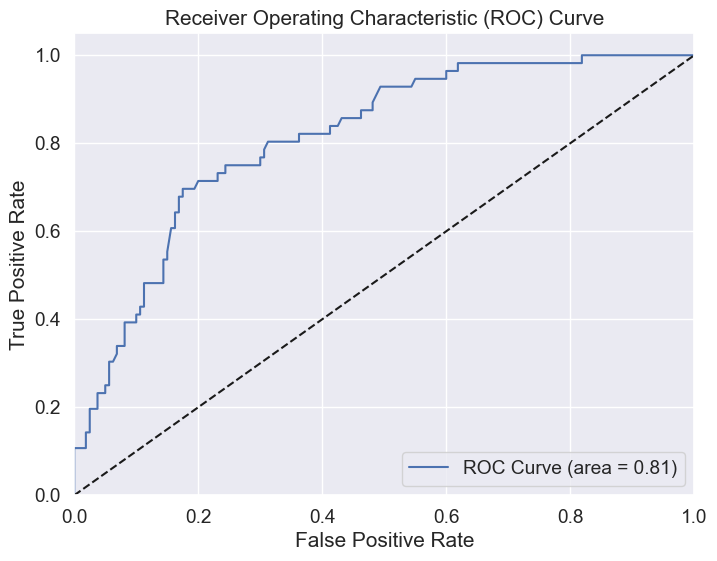

In [579]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

y_pred = result.predict(X_test_scaled)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion_mat)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [580]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
result.predict()

array([0.94, 0.41, 0.06, 0.04, 0.36, 0.17, 0.53, 0.24, 0.07, 0.09, 0.72,
       0.28, 0.02, 0.06, 0.62, 0.04, 0.49, 0.64, 0.84, 0.10, 0.12, 0.03,
       0.87, 0.05, 0.04, 0.07, 0.22, 0.11, 0.11, 0.28, 0.61, 0.77, 0.02,
       0.06, 0.26, 0.15, 0.23, 0.05, 0.27, 0.14, 0.40, 0.22, 0.76, 0.13,
       0.64, 0.42, 0.03, 0.23, 0.02, 0.04, 0.72, 0.28, 0.59, 0.20, 0.17,
       0.39, 0.07, 0.09, 0.16, 0.35, 0.10, 0.14, 0.23, 0.02, 0.20, 0.19,
       0.53, 0.54, 0.47, 0.13, 0.70, 0.15, 0.12, 0.53, 0.04, 0.09, 0.10,
       0.05, 0.03, 0.11, 0.07, 0.20, 0.04, 0.13, 0.02, 0.04, 0.70, 0.75,
       0.42, 0.32, 0.43, 0.12, 0.99, 0.04, 0.13, 0.29, 0.05, 0.66, 0.70,
       0.64, 0.60, 0.48, 0.26, 0.06, 0.07, 0.11, 0.59, 0.04, 0.40, 0.09,
       0.51, 0.02, 0.09, 0.73, 0.27, 0.51, 0.03, 0.04, 0.13, 0.03, 0.07,
       1.00, 0.70, 0.24, 0.65, 0.05, 0.84, 0.08, 0.09, 0.37, 0.10, 0.30,
       0.43, 0.33, 0.10, 0.06, 0.04, 0.03, 0.44, 0.04, 0.07, 0.07, 0.29,
       0.03, 0.89, 0.12, 0.09, 0.04, 0.49, 0.19, 0.

In [581]:
np.array(Dfplog["Individual Award"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [582]:
result.pred_table()

array([[331.00, 28.00],
       [71.00, 72.00]])

In [583]:
cm_df = pd.DataFrame(result.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,331.0,28.0
Actual 1,71.0,72.0


In [584]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8027888446215139

In [658]:
Dfpl.columns

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Value', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot',
       'ContributionPerMin', 'GoalPerCountry', 'ValuePerCountry',
       'Individual Award', 'Goal Per Season', 'Assist Per Season',
       'RecentProgress', 'CalculatedValue'],
      dtype='object')

# Random Forest

In [663]:
Data2020=pd.read_csv("/Users/aa085/Music/Data20.csv")
Data2021=pd.read_csv("/Users/aa085/Music/Data21.csv")
Data2022=pd.read_csv("/Users/aa085/Music/Data22.csv")

In [670]:
G2020=Data2020["Goals"]
G2021=Data2021["Goals"]
G2022=Data2022["Goals"]

In [671]:
cop=Dfpl.copy()

In [673]:
G2020=pd.DataFrame(G2020)
G2021=pd.DataFrame(G2021)
G2022=pd.DataFrame(G2022)

In [674]:
G2020.rename(columns={'Goals': 'Goals2020'}, inplace=True)
G2021.rename(columns={'Goals': 'Goals2021'}, inplace=True)
G2022.rename(columns={'Goals': 'Goals2022'}, inplace=True)

In [680]:
Data0=pd.read_csv("/Users/aa085/Music/Data0.csv")

In [681]:
Dfpl=pd.concat([Dfpl,Data0],axis=1)

In [700]:
Dfpl = pd.concat([Dfpl, G2020, G2021,G2022], axis=1)
Dfpl.columns

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Value', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot',
       'ContributionPerMin', 'GoalPerCountry', 'ValuePerCountry',
       'Individual Award', 'Goal Per Season', 'Assist Per Season',
       'RecentProgress', 'CalculatedValue', 'League', 'Team', 'Goals2022',
       'Goals2020', 'Goals2021'],
      dtype='object')

In [702]:
Dfpl.loc[Dfpl["Goals2020"] == "6/3/21", "Goals2020"] = np.percentile(Dfpl["Goals2022"], 25)
Dfpl.loc[Dfpl["Goals2020"] == "10/9/20 ", "Goals2020"] = np.percentile(Dfpl["Goals2022"], 25)

In [707]:
Dfpl["Goals2020"] = pd.to_numeric(Dfpl["Goals2020"], errors='coerce')
Dfpl["Goals2020"].fillna(0, inplace=True)
Dfpl["Goals2020"] = Dfpl["Goals2020"].astype(int)
Dfpl["Goals2021"] = Dfpl["Goals2021"].str.replace("-", "0").astype(int)
Dfpl["Goals2022"] = Dfpl["Goals2022"].str.replace("-", "0").astype(int)

In [726]:
Dfpl.columns

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Value', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot',
       'ContributionPerMin', 'GoalPerCountry', 'ValuePerCountry',
       'Individual Award', 'Goal Per Season', 'Assist Per Season',
       'RecentProgress', 'CalculatedValue', 'League', 'Team', 'Goals2022',
       'Goals2020', 'Goals2021'],
      dtype='object')

In [748]:
Dfpl['League_Code'] = pd.factorize(Dfpl['League'])[0]

In [783]:
Dfpl['position'] = pd.factorize(Dfpl['Sub-Position'])[0]

In [759]:
Dfpl['Cups'] = Dfpl['Achievements'].str.split(",").apply(len)

In [831]:
Every=Dfpl.copy()

In [830]:
Dfpl["OneSeasonWonder"]=Dfpl["Goals2020"]/Dfpl["Goal Per Season"]
Dfpl.sort_values(by="OneSeasonWonder",ascending=False)[['Name','Goals2020','Goal Per Season','Individual Award','Currentvalue(M)','minutos','ages',"Goals2021","League_Code"]].head(30)

,Name,Goals2020,Goal Per Season,Individual Award,Currentvalue(M),minutos,ages,Goals2021,League_Code
679,Ademir,16,3.583333,0,3.5,12696,28,8,21
535,Tajon Buchanan,9,2.125000,0,10.0,8592,24,1,11
717,Agustín Álvarez,23,5.833333,1,8.0,6908,22,1,8
683,Michael,18,4.727273,0,8.0,16393,27,3,9
599,Rafael Navarro,16,4.285714,0,3.5,7283,23,7,18
595,Martín Satriano,14,3.833333,0,7.0,6329,22,5,6
349,Thomas Henry,21,6.000000,0,4.0,16020,29,12,8
306,Georgios Giako...,29,8.416667,1,5.0,15524,28,17,18
294,Ivan Sergeev,43,12.583333,1,5.0,20671,28,13,13
354,Jerry Yates,23,6.909091,0,4.0,18569,27,8,0


In [907]:
Every=Dfpl.copy()

In [909]:
Dfpl.sort_values(by="Goals2022",ascending=False)[['Name','Goals2022','Goal Per Season','Individual Award','Currentvalue(M)','minutos','ages',"Goals2021","League_Code"]].head(15)

,Name,Goals2022,Goal Per Season,Individual Award,Currentvalue(M),minutos,ages,Goals2021,League_Code
58,Robert Lewando...,48,28.842105,1,30.0,60609,35,50,3
294,Ivan Sergeev,43,12.583333,1,5.0,20671,28,13,13
424,Kylian Mbappé,42,32.000000,1,180.0,25615,24,39,6
418,Erling Haaland,41,28.857143,1,180.0,17474,23,29,4
113,Cristiano Ronaldo,36,33.181818,1,15.0,80484,38,24,9
16,Harry Kane,33,23.285714,1,110.0,40963,30,27,2
45,Ivan Toney,33,15.000000,1,35.0,28418,27,14,4
37,Romelu Lukaku,30,21.214286,1,40.0,44943,30,15,8
109,Gerard Moreno,30,11.800000,1,15.0,31152,31,13,3
213,Liam Delap,30,14.000000,1,7.0,7662,20,8,0


In [910]:
X = Dfpl[['Goal Per Season','Individual Award','Currentvalue(M)','minutos','ages',"Goals2021",'League_Code']]
y = Dfpl['Goals2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(29.696748430493273, 0.43995958840835614)

In [799]:
Dfpl.to_csv("Zula.csv")

In [770]:
Dfpl=Dfpl.drop(["Value"],axis=1)

In [798]:
Dfpl=Dfpl.drop(['GoalPerCountry', 'ValuePerCountry'],axis=1)

<Axes: xlabel='Goals2022', ylabel='Count'>

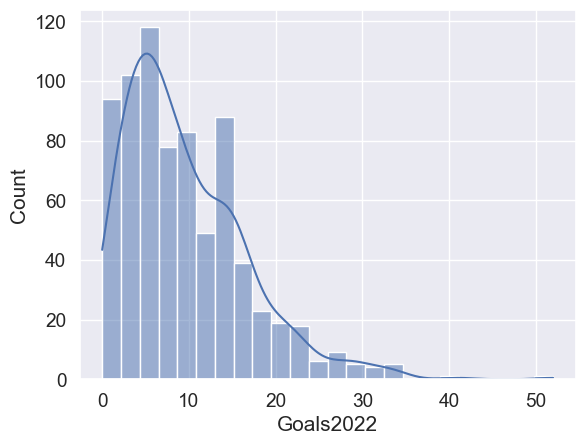

In [802]:
sns.histplot(Dfpl["Goals2022"],kde=True)

<Axes: xlabel='Goals', ylabel='Count'>

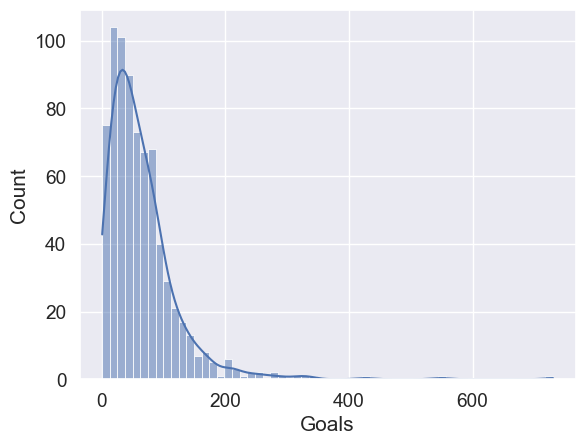

In [803]:
sns.histplot(Dfpl["Goals"],kde=True)

In [912]:
Dfplheat=Dfpl.drop(["RecentProgress","Progress","Difference Percentage"],axis=1)

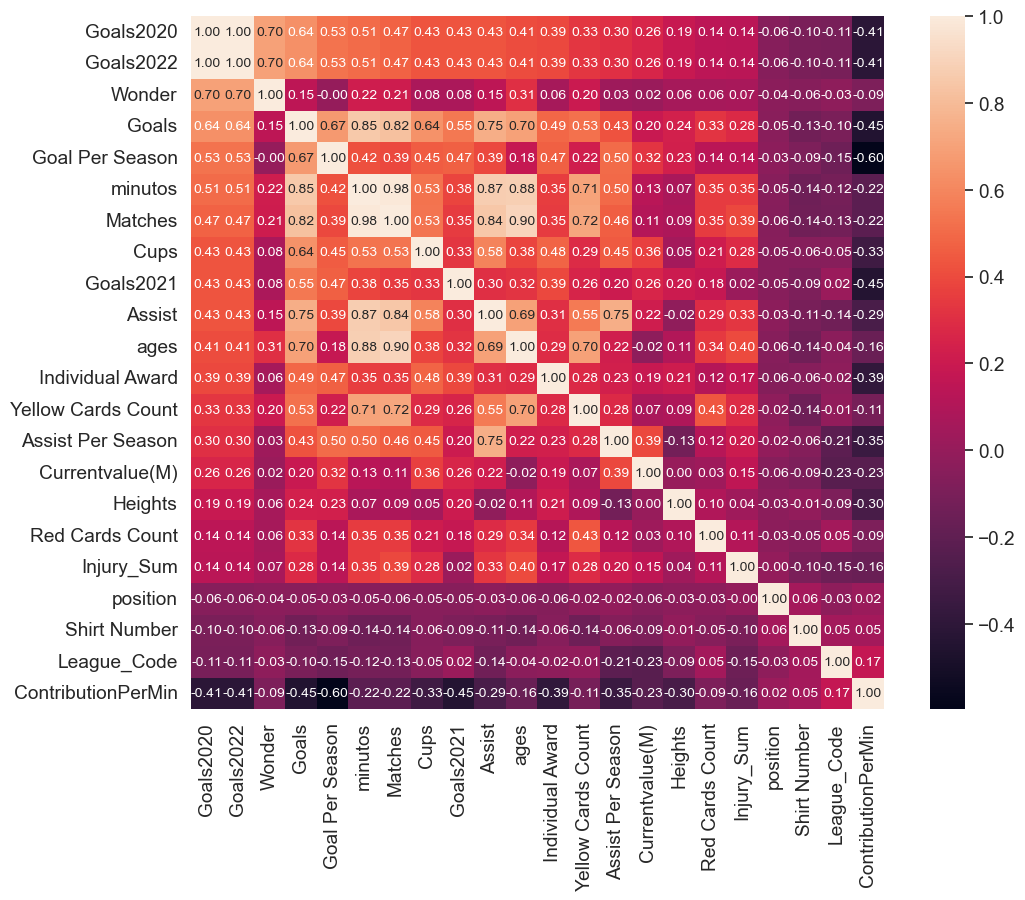

In [913]:
corrmat = Dfplheat.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))

k = 25
cols = corrmat.nlargest(k, 'Goals2022')['Goals2022'].index
cm = np.corrcoef(Dfpl[cols].values.T) 

sns.set(font_scale=1.25) 

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show() 

# Feature Selection

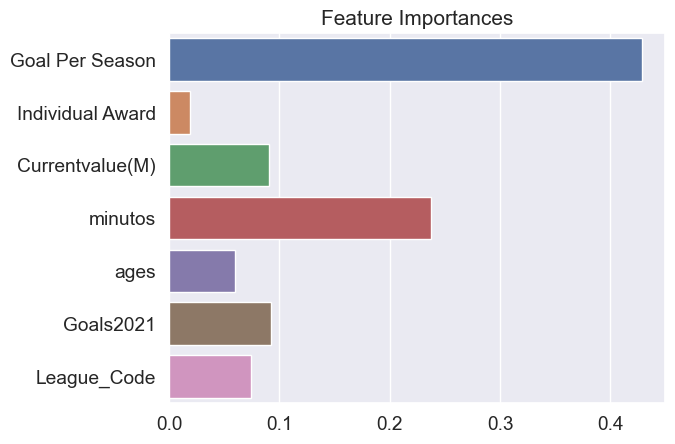

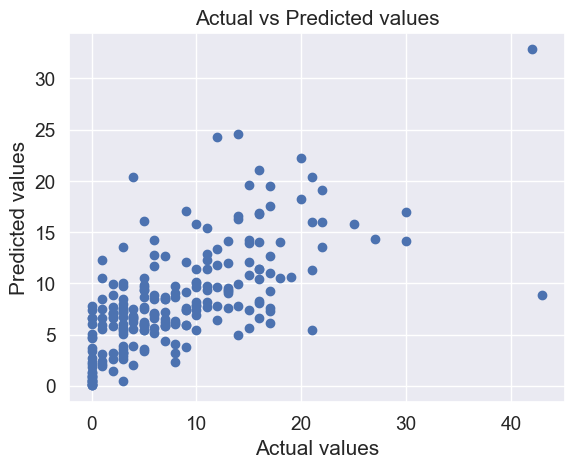

Mean Squared Error: 29.696748430493273
R2 Score: 0.43995958840835614
Mean Absolute Error: 3.867309417040359


In [885]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

feature_importances = rf.feature_importances_

sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

# Hyperparameter Grid Search

In [880]:
n_estimators_range_specific = list(range(150, 301, 10))  
max_depth_range_specific = [5, 10]

best_r2_specific = -1
best_params_specific = {'n_estimators': None, 'max_depth': None}

for n_estimators in n_estimators_range_specific:
    for max_depth in max_depth_range_specific:
        rf_specific = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_specific.fit(X_train, y_train)
        y_pred_specific = rf_specific.predict(X_test)
        r2_specific = r2_score(y_test, y_pred_specific)
        
        if r2_specific > best_r2_specific:
            best_r2_specific = r2_specific
            best_params_specific['n_estimators'] = n_estimators
            best_params_specific['max_depth'] = max_depth

best_r2_specific, best_params_specific


(0.46571730707340386, {'n_estimators': 220, 'max_depth': 5})

In [918]:
X = Dfpl[['Goal Per Season','Currentvalue(M)','minutos','ages',"Goals2021",'League_Code']]
y = Dfpl['Goals2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=220, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(28.01583059564538, 0.4716594197310783)

# Cross Validation

In [898]:
features = ['Goal Per Season', 'Currentvalue(M)', 'minutos', 'ages', 'Goals2021', 'League_Code']
target = 'Goals2022'


X2 = Dfpl[features]
y2 = Dfpl[target]

kf = KFold(n_splits=7, shuffle=True, random_state=42)

rf = RandomForestRegressor(n_estimators=220, max_depth=5, random_state=42)

fold_performance = []
problematic_rows = []

for train_index, test_index in kf.split(X):
    
    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2.iloc[train_index], y2.iloc[test_index]

    
    rf.fit(X_train2, y_train2)

    
    y_pred2 = rf.predict(X_test2)

   
    mse = mean_squared_error(y_test2, y_pred2)
    r2 = r2_score(y_test2, y_pred2)
    
    
    fold_performance.append((mse, r2))

   
    if r2 < 0.3:
        problematic_rows.extend(list(zip(test_index, y_test2, y_pred2)))


fold_performance, problematic_rows[:5]  

([(34.60310992020967, 0.4097886550494638),
  (22.586306655802215, 0.5069298755091023),
  (26.91711130034467, 0.38116771993691234),
  (28.421318745734197, 0.40326091540223774),
  (37.63565436599042, 0.3638779599285341),
  (22.715112161598288, 0.43866305036824293),
  (23.86179825694109, 0.5810193491693558)],
 [])

In [900]:
r2_scores = [performance[1] for performance in fold_performance]
std_dev_r2 = np.std(r2_scores)
std_dev_r2

0.07159706153700052